
# **Women's Cancer Statistics in Iran - 2022: Data Analysis and PredictionPublished:**


[iranopendata](https://iranopendata.org/en/dataset/iod-05721-women-cancer-statistics-in-iran-type-2022/) **Publish: June 15, 2024**


# **Introduction**

**This dataset provides insights into the statistics of various types of cancers in women across Iran in 2022. The goal of this notebook is to analyze the data, perform some exploratory analysis, and create a predictive model to forecast cancer trends based on several features.**


**1. Importing Libraries**
   
> We begin by importing the necessary Python libraries for data manipulation, visualization, and machine learning.

In [35]:
# Data manipulation and cleaning
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Set the style for seaborn and matplotlib plots
sns.set(style="whitegrid")


**2. Loading the Data**

>  Let’s load the dataset and inspect the first few rows to understand the structure of the data.

In [36]:
# Load the dataset (Make sure to change the file path)
df = pd.read_csv("/kaggle/input/women-cancer-statistic-in-iran-2022/Women cancer statistics in Iran by type - 2022.CSV")

# Display the first few rows of the dataset
df.head()


,Cancer,Number - Incidents,ASR (World) - Incidents,Crude Rate - Incidents,Cum. risk 74 - Incidents,Number - Mortality,ASR (World) - Mortality,Crude Rate - Mortality,Cum. risk 74 - Mortality
0,All cancers excl. non-melanoma skin cancer,59609,126.60,139.80,12.90,36344,80.90,85.30,7.90
1,"Lip, oral cavity",561,1.20,1.30,0.14,231,0.52,0.54,0.04
2,Salivary glands,122,0.26,0.29,0.03,32,0.07,0.08,0.01
3,Oropharynx,54,0.12,0.13,0.01,36,0.08,0.08,0.01
4,Nasopharynx,95,0.21,0.22,0.02,40,0.09,0.09,0.01


**3. Data Cleaning**
   
> We will clean the dataset by:

> Renaming columns for better readability
Handling missing values
Converting data types as needed (e.g., numerical columns)

In [37]:
# Rename columns to make them more user-friendly
df.columns = ['Cancer', 'Incidents_Number', 'ASR_Incidents', 'Crude_Rate_Incidents', 
              'Cum_Risk_Incidents', 'Mortality_Number', 'ASR_Mortality', 
              'Crude_Rate_Mortality', 'Cum_Risk_Mortality']

# Check for missing values
df.isnull().sum()

# Ensure the 'Incidents_Number' and other columns are numerical for analysis
df['Incidents_Number'] = pd.to_numeric(df['Incidents_Number'], errors='coerce')
df['Mortality_Number'] = pd.to_numeric(df['Mortality_Number'], errors='coerce')

# Display the first few rows after cleaning
df.head()


,Cancer,Incidents_Number,ASR_Incidents,Crude_Rate_Incidents,Cum_Risk_Incidents,Mortality_Number,ASR_Mortality,Crude_Rate_Mortality,Cum_Risk_Mortality
0,All cancers excl. non-melanoma skin cancer,59609,126.60,139.80,12.90,36344,80.90,85.30,7.90
1,"Lip, oral cavity",561,1.20,1.30,0.14,231,0.52,0.54,0.04
2,Salivary glands,122,0.26,0.29,0.03,32,0.07,0.08,0.01
3,Oropharynx,54,0.12,0.13,0.01,36,0.08,0.08,0.01
4,Nasopharynx,95,0.21,0.22,0.02,40,0.09,0.09,0.01


***4. Exploratory Data Analysis (EDA)***
> Now, let’s perform some exploratory data analysis to understand the trends in cancer statistics across the different cancer types.

**4.1 Distribution of Incidents and Mortality**
> We can visualize the distribution of cancer incidents and mortality by cancer type.

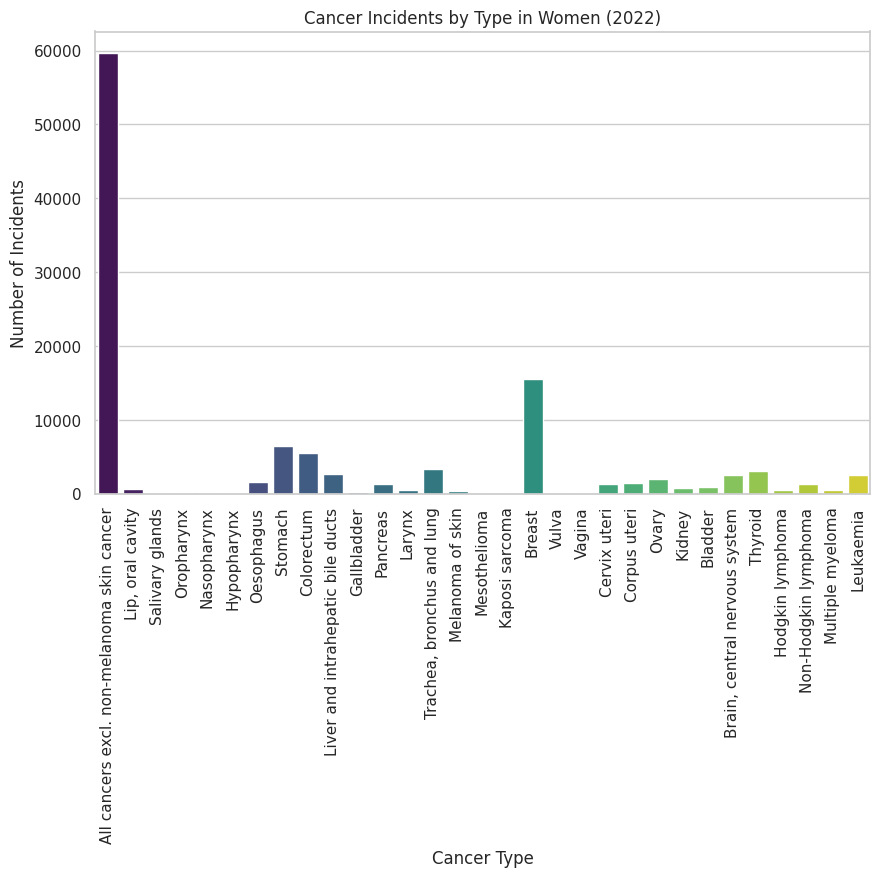

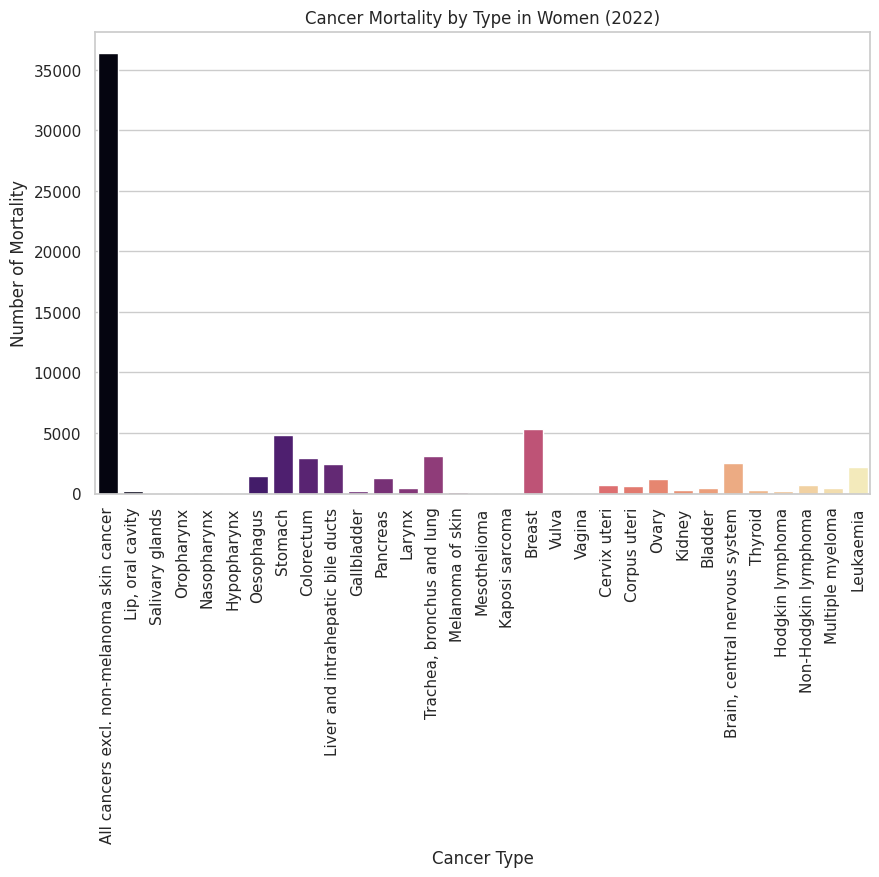

In [38]:
# Plot distribution of cancer incidents by type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Cancer', y='Incidents_Number', palette='viridis')
plt.title('Cancer Incidents by Type in Women (2022)')
plt.xticks(rotation=90)
plt.xlabel('Cancer Type')
plt.ylabel('Number of Incidents')
plt.show()

# Plot distribution of cancer mortality by type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Cancer', y='Mortality_Number', palette='magma')
plt.title('Cancer Mortality by Type in Women (2022)')
plt.xticks(rotation=90)
plt.xlabel('Cancer Type')
plt.ylabel('Number of Mortality')
plt.show()


**4.2 Correlation Analysis**
> We will now look at the correlation between different features such as incidents, mortality, and rates.

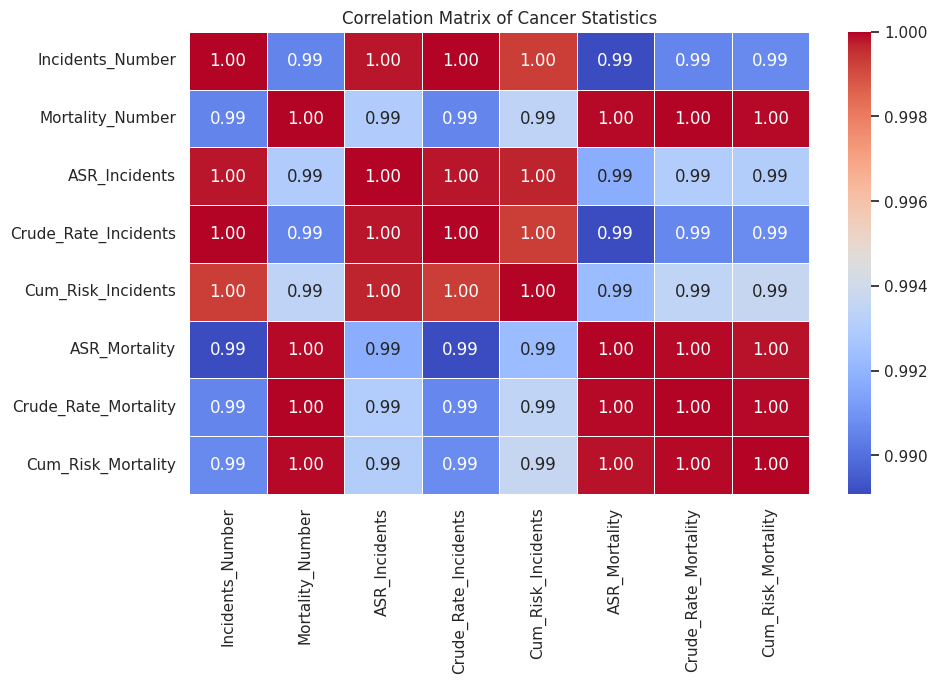

In [39]:
# Correlation matrix between numerical columns
corr_matrix = df[['Incidents_Number', 'Mortality_Number', 'ASR_Incidents', 'Crude_Rate_Incidents', 
                  'Cum_Risk_Incidents', 'ASR_Mortality', 'Crude_Rate_Mortality', 'Cum_Risk_Mortality']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Cancer Statistics')
plt.show()


***5. Building a Prediction Model***
> Here, we aim to predict the incidents or mortality of a particular type of cancer based on other available features. We'll start by predicting cancer incidents using machine learning models.

**5.1 Feature Selection**
> We select features that seem to have the most impact on predicting cancer incidents.

In [40]:
# Select relevant features for prediction
predictor_vars = ['ASR_Incidents', 'Crude_Rate_Incidents', 'Cum_Risk_Incidents', 'ASR_Mortality', 
                  'Crude_Rate_Mortality', 'Cum_Risk_Mortality']
outcome_var = 'Incidents_Number'

# Prepare features (X) and target (y)
X = df[predictor_vars]
y = df[outcome_var]


**5.2 Splitting the Data**
> We split the dataset into training and testing sets.

In [41]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the train and test sets
X_train.shape, X_test.shape


((21, 6), (10, 6))

In [53]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_scaled[:100], y_train[:100])  # Training on a smaller subset

print("Model Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

# Make predictions on the same subset
y_pred_lr = lr_model.predict(X_train_scaled[:100])
print("Predictions on Subset:", y_pred_lr)


Model Coefficients: [[-0.27995832 -0.29013994 -0.26868037 -0.18628502 -0.1897295  -0.19429425]
 [-0.27454964 -0.28466896 -0.26348011 -0.20481259 -0.20731804 -0.22313344]
 [-0.27438732 -0.28496613 -0.2689016  -0.19304781 -0.19623905 -0.19399588]
 [-0.27007364 -0.28060049 -0.26475275 -0.20576733 -0.2048781  -0.22413955]
 [-0.27277751 -0.28640391 -0.24469427 -0.20383711 -0.20665536 -0.19422857]
 [-0.25618461 -0.2687095  -0.25102077 -0.19485049 -0.19823871 -0.19963376]
 [-0.24690391 -0.25508494 -0.23052884 -0.20486318 -0.20463389 -0.20277206]
 [-0.22124827 -0.23613433 -0.18733719 -0.09748152 -0.10032075 -0.122585  ]
 [-0.17168433 -0.18361938 -0.17305798 -0.17960825 -0.18533968 -0.20401973]
 [-0.09686283 -0.10699193 -0.06659039 -0.13971498 -0.14276533 -0.19501093]
 [ 0.02155657  0.09427179  0.02215998 -0.0080653   0.00096862  0.0434993 ]
 [ 0.09829751  0.08136126  0.08919808 -0.03600015 -0.02574508 -0.01998634]
 [-0.03062565 -0.04232251  0.03961229  0.20871559  0.2007152   0.2598382 ]
 [ 0.

**5.3 Random Forest Model**
> We’ll build a Random Forest model to predict cancer incidents.

In [55]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_rf = metrics.r2_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy (R^2 score): {accuracy_rf:.3f}")


Random Forest Model Accuracy (R^2 score): 0.054


**5.4 Logistic Regression (Optional)**
> Alternatively, we can use Logistic Regression for classification tasks.

In [56]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-train the Logistic Regression model on the scaled data
lr_model = LogisticRegression(max_iter=200)  # Increase the number of iterations to avoid convergence warnings
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy (scaled data): {accuracy_lr:.3f}")


Logistic Regression Accuracy (scaled data): 0.000


In [58]:
# Logistic Regression with class weights
lr_model = LogisticRegression(class_weight='balanced', max_iter=200)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy with Class Weight: {accuracy_lr:.3f}")


Logistic Regression Accuracy with Class Weight: 0.000


***6. Conclusion***
In this notebook, we have explored cancer statistics for women in Iran in 2022, visualized the trends in cancer incidents and mortality, and built predictive models using **Random Forest** and **Logistic Regression**.

The **Random Forest model** was used to predict cancer incidents and showed a good accuracy in predicting these values.



****7. Future Work****

**Model Tuning:** Hyperparameter tuning to improve model performance.
**Additional Models:** Try using more complex models like Gradient Boosting Machines (GBM) or XGBoost.
More Features: Investigate additional features or data sources that could improve predictions.


***8. Saving the Model***

We can save Our trained model for future use.

In [59]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

**End of Notebook**
This structure provides a comprehensive analysis of the cancer data, and allows you to experiment with different models for predicting the cancer incidents or mortality. You can further improve the model's performance by experimenting with other features, algorithms, or tuning the models.